# Problem Statement

#### This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

``Thus, in this project, you have to predict the "Class" column.``


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Data Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

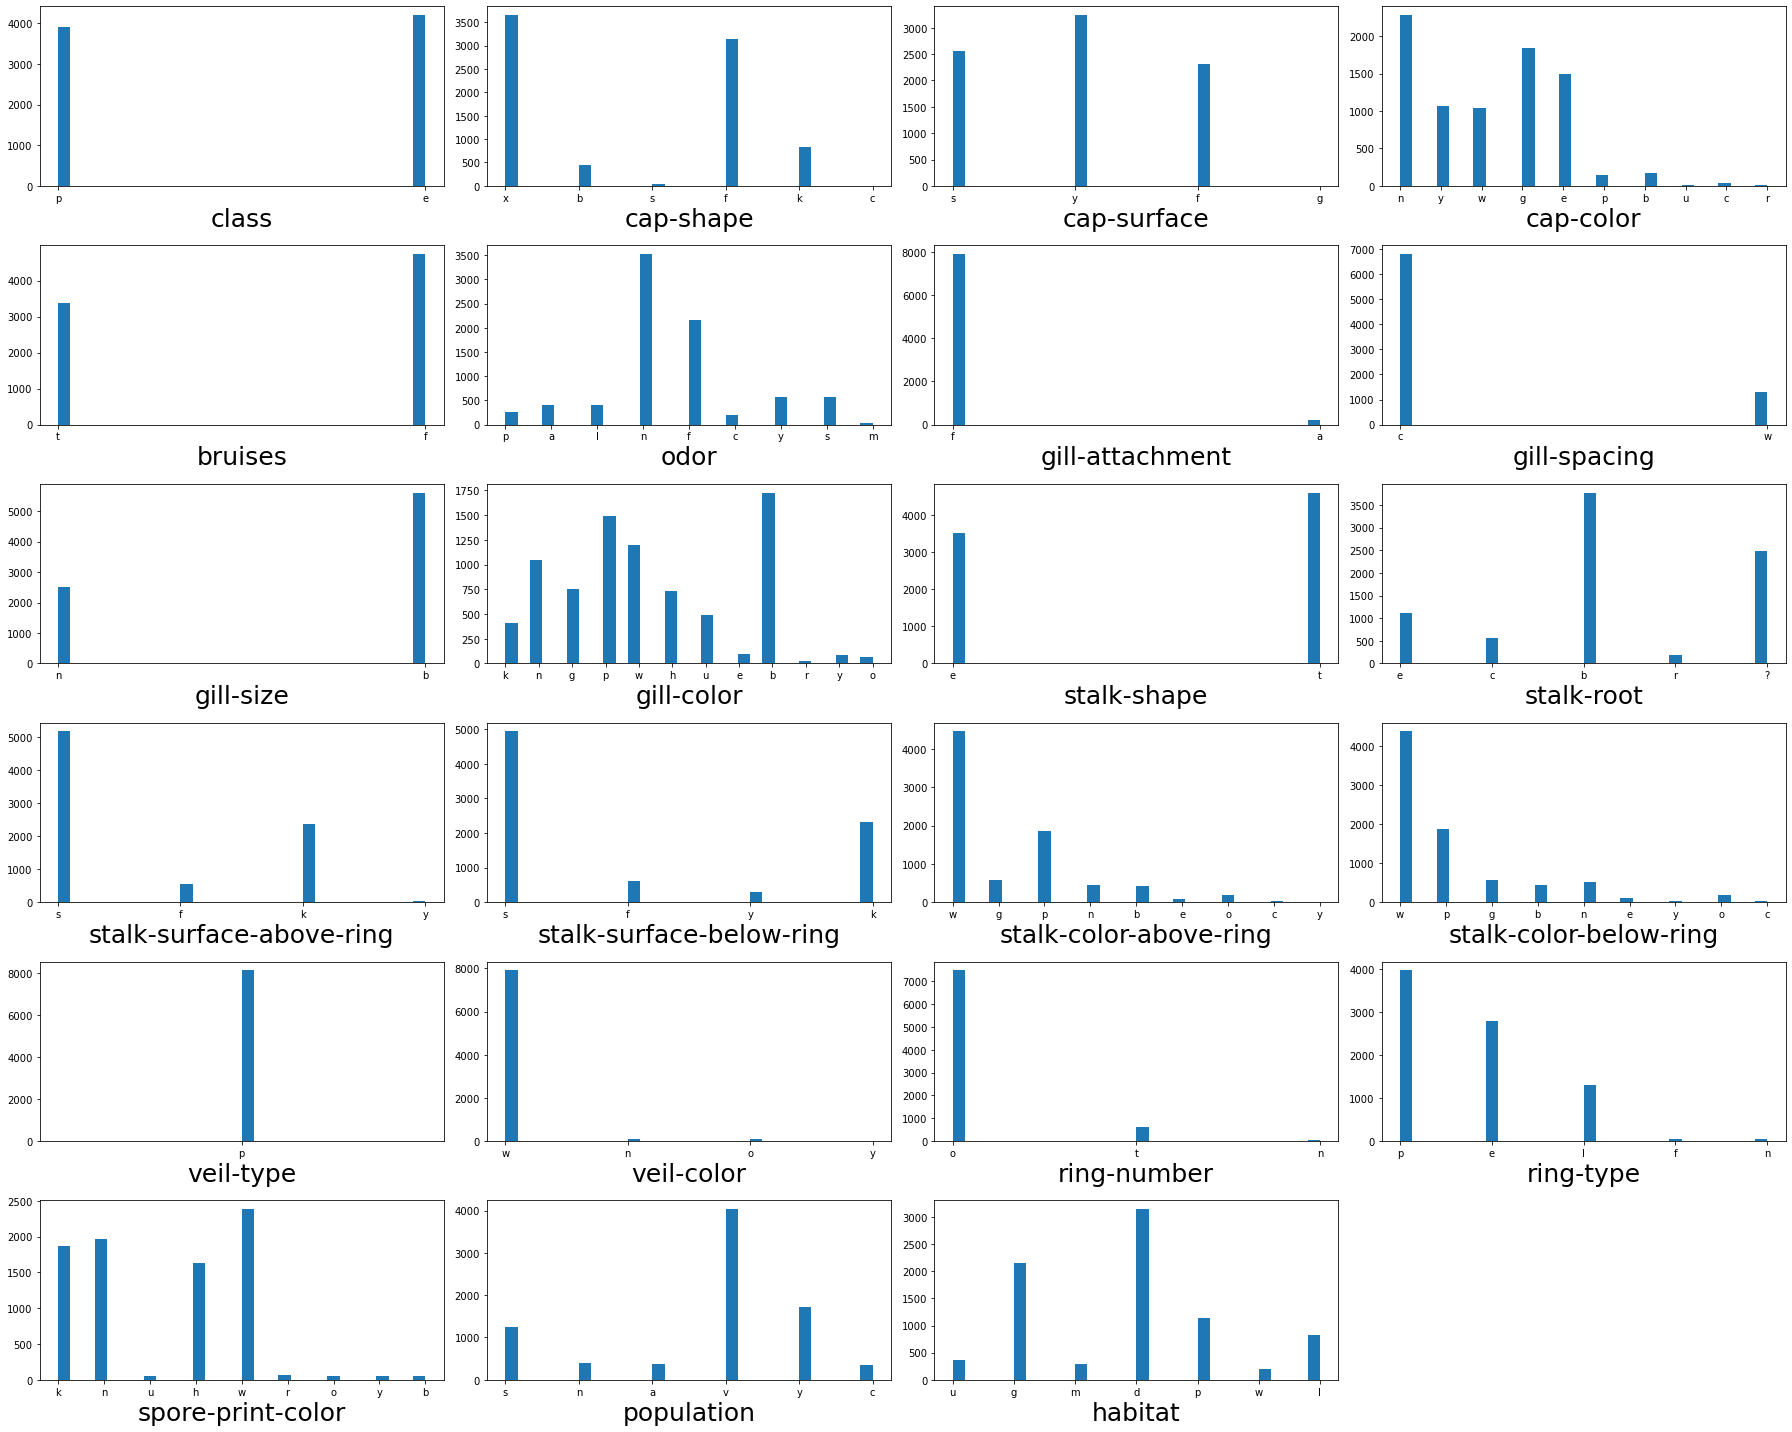

In [7]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(6,4,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## About the column

`Total number of Rows= 8124`
`Total number of columns=23`
- 1.Class:- In this dataset there are Two classes 'e' and 'p'. Here 'e' means Edible and 'p' means poisonous.
- 2. cap-shape:- The different shapes of cap of mushrooms.
- 3. cap-surface:- Most people trace out according the surface of mushrooms that The whether it is worth eating or not.
- 4. cap-color:- cap color is also identify to predict the mushrooms is poisonous or not.
- 5. bruises:- some mushrooms are well known for their high psilocybin/psilocin content and their above-average tendency to bruise blue.
- 6. odor:- The powerful smell attracts flies, bugs, and various other insects that carry these spores on their legs, body, and wings from one place to another, securing the reproduction of this fungus.
- 7. gill-attachment:- Mushroom gills are the thin, papery structures that hang vertically under the cap. The sole purpose of these gills, called lamellae, is to produce spores. The spores are then dropped from the gills by the millions where they are scattered by wind currents.
- 8:- gill-spacing:-Gill spacing can be a useful character in determining a mushroom's identity, but it does have the drawback that we don't have a term for "normal", or "average". 
- 9:- gill-size:- The size of gill is also important.
- 10. gill-color:- The color of gills is also important factor.
- 11. stalk-shape:- The stalk (also called the stipe, or stem) may be central and support the cap in the middle, or it may be off-center and/or lateral, as in species of Pleurotus and Panus.
- 12. stalk-root:- Stalk (or Stem, or Stape): the main support of the mushroom; it is topped by the cap. Not all mushrooms have a stalk (stem) (ref.). Another feature to consider when identifying mushrooms is whether they bruise or bleed a specific color. Certain mushrooms will change colors when damaged or injured.
- 13. stalk-surface-above-ring:- The middle of the mushrooms.
- 14. stalk-color-below-ring:- Under the ring which color are present.
- 15. veil-type:-In some mushrooms, both a partial veil and a universal veil may be present. In the immature fruit bodies of some basidiomycete fungi, the partial veil extends from the stem surface to the cap margin and shields the gills during development, and later breaks to expose the mature gills.
- 16.veil-color:- artial veils can bear other important implications for mushroom identification: they also catch falling spores. This is important in that spore color is often important for identifying your mushroom.
- 17.ring-number:- The ring is the remnant of the veil (the veil is the tissue that connects the stem and the cap before the gills are exposed and the fruiting body develops).
- 18.ring-type:- ring type is also important.
- 19. spore-print-color:- The spore print is the powdery deposit obtained by allowing spores of a fungal fruit body to fall onto a surface underneath. It is an important diagnostic character in most handbooks for identifying mushrooms.
- 20.Population:- With increasing population, food demand problems in developing and under developed countries, mushrooms can play an important role to enrich human diet particularly in India where a large section of the population are vegetarians.
- 21.habitat:- Mushrooms are found in a great variety of habitats, although each species may limited in the number of these it can occupy. For example, a mushroom that usually grows on rotting logs in the forest is unlikely to be found in sand dunes.

## Checking the null Values

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Great! there are no null values present in my dataset.

## Describing The Dataset:

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Since my dataset is object datatype so that we can't get not much imformation by describing the dataset...

But I can check the unique values from that.

## Checking balance of data
for every classification problem we have to check the balance of data. If my datasets are not balance then there is good chance that our model will be biased. For that we need to get rid of that imbalancing problem.

In [11]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

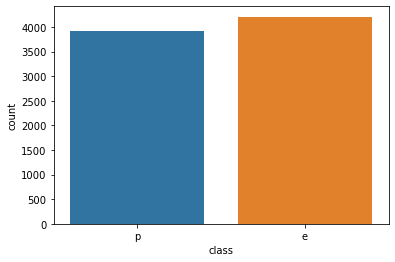

In [12]:
sns.countplot(x='class',data=df)

`We can clearly see that our data is perfectly balance already`

## Checking duplicates

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(8124, 23)

There is not any duplicate present in our dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Here we can can clearly see that my whole dataset is object data type.

## Encode the dataset using LabelEncoding.

In [15]:
from sklearn.preprocessing import LabelEncoder

` By label encoding we convert the dataset from string to integer.`

In [16]:
lb=LabelEncoder()
for val in df.columns:
    df[val]=lb.fit_transform(df[val])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We are successfully converted our dataset from string to integer data type by label Encoder.

# Model: 1 
### ` Those features are positivly correlated with Label, consider them only.` 

## Correlation:-

In [17]:
cor=df.corr()
relation=cor['class'].sort_values(ascending=True)
relation

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
Name: class, dtype: float64

In [18]:
relation.index

Index(['gill-color', 'bruises', 'ring-type', 'stalk-root', 'gill-spacing',
       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-number',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'stalk-shape',
       'odor', 'cap-color', 'cap-shape', 'gill-attachment', 'veil-color',
       'spore-print-color', 'cap-surface', 'habitat', 'population',
       'gill-size', 'class', 'veil-type'],
      dtype='object')

We can clearly see that most of the columns are negatively correlate with the target. we will drop them all.

<AxesSubplot:>

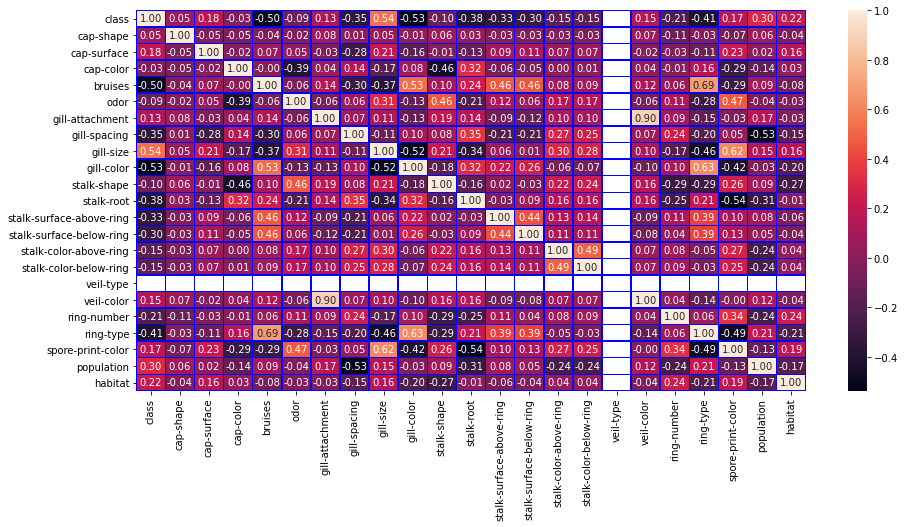

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True, linewidths=0.5,linecolor='b',fmt='.2f')

## Observation of heatmap:
- column 'veil-type' is not correlate with any column and as well as target column.
- Most of the columns are negatively correlate with the target column.


In [20]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [21]:
# droping the column
df=df.drop(columns=['veil-type'],axis=1)

## separating postively correlate columns

In [22]:
posi_corr=[]
for i in range(len(relation)):
    if relation[i]>0:
        posi_corr.append(relation.index[i])
posi_corr

['cap-shape',
 'gill-attachment',
 'veil-color',
 'spore-print-color',
 'cap-surface',
 'habitat',
 'population',
 'gill-size',
 'class']

In [23]:
x=df[posi_corr]
x=x.drop(columns=['class'],axis=1)
x.head()

,cap-shape,gill-attachment,veil-color,spore-print-color,cap-surface,habitat,population,gill-size
0,5,1,2,2,2,5,3,1
1,5,1,2,3,2,1,2,0
2,0,1,2,3,2,3,2,0
3,5,1,2,2,3,5,3,1
4,5,1,2,3,2,1,0,0


Now we have only 8 columns and 8124 rows.

In [24]:
y=df['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [89]:
rf=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()

# Splitting the dataframe

# Logistic Regression

In [83]:
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i , "The model performs very well")
        print("At random state ", i)
        print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
        print("Testing r2 score is : ", accuracy_score(y_test,pred_test)*100)
        

At random state 0 The model performs very well
At random state  0
Training accuracy is :  85.47513540128016
Testing r2 score is :  85.47513540128016
At random state 55 The model performs very well
At random state  55
Training accuracy is :  85.5407845068111
Testing r2 score is :  85.47513540128016
At random state 102 The model performs very well
At random state  102
Training accuracy is :  85.47513540128016
Testing r2 score is :  85.47513540128016
At random state 134 The model performs very well
At random state  134
Training accuracy is :  86.82094206466437
Testing r2 score is :  86.75529295913343
At random state 144 The model performs very well
At random state  144
Training accuracy is :  85.50795995404563
Testing r2 score is :  85.52437223042836


#### At Random State 134, the model give best result to us.

In [84]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=134)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))

86.75529295913343
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1055
           1       0.89      0.83      0.86       976

    accuracy                           0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



# Cross validation score for logistic regression.

In [85]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_lr)
for i in range(20,40):
    lrscore=cross_val_score(lr,x,y,cv=i)
    lsc=lrscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", lsc)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 20
cross validation score is  0.8422501543191199
accuracy score is  0.8675529295913343


at cv :- 21
cross validation score is  0.8433453766023956
accuracy score is  0.8675529295913343


at cv :- 22
cross validation score is  0.8449877815731474
accuracy score is  0.8675529295913343


at cv :- 23
cross validation score is  0.8458279142946412
accuracy score is  0.8675529295913343


at cv :- 24
cross validation score is  0.8455254752055298
accuracy score is  0.8675529295913343


at cv :- 25
cross validation score is  0.8444281101614435
accuracy score is  0.8675529295913343


at cv :- 26
cross validation score is  0.844551282051282
accuracy score is  0.8675529295913343


at cv :- 27
cross validation score is  0.8450764939912226
accuracy score is  0.8675529295913343


at cv :- 28
cross validation score is  0.8453113097354122
accuracy score is  0.8675529295913343


at cv :- 29
cross validation score is  0.8450646880423541
accuracy score is  0.8675529295913343


at cv :- 30
cross val

## Observation CV for LR

Here we can clearly see that there are differeces between  cvScore and accuracy i.e. my model was little bit overfitted . since at CV=39, the mean of CV score is 0.8487 and the accuracy score is 0.8675. The difference between them is very less.

In [86]:
lrscore=cross_val_score(lr,x,y,cv=39).mean()
print("After checking the overfitting, my new Score is :- ", lrscore)

After checking the overfitting, my new Score is :-  0.8487585289204722


# ROC AUC Curve

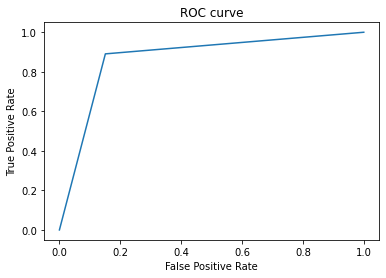

AUC value is 0.8698154126963877 


In [87]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred_test,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## AUC score for Logistic Regression is 86.98%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [ ]:
rf=RandomForestClassifier()

# RandomForestClassifier:


In [90]:
for i in range(0,500,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i , "The model performs very well")
        print("At random state ", i)
        print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
        print("Testing r2 score is : ", accuracy_score(y_test,pred_test)*100)

### `At random state=900 random forest give us the best result.`


In [91]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=900)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))

99.40915805022156
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1038
           1       0.99      1.00      0.99       993

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



# Cross Validation for Random Forest:


In [92]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_rf)
for i in range(11,30):
    rfscore=cross_val_score(rf,x,y,cv=i)
    rfsc=rfscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", rfsc)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 11
cross validation score is  0.9670276146727513
accuracy score is  0.9940915805022157


at cv :- 12
cross validation score is  0.9679960610536681
accuracy score is  0.9940915805022157


at cv :- 13
cross validation score is  0.9677538461538462
accuracy score is  0.9940915805022157


at cv :- 14
cross validation score is  0.9706118633577236
accuracy score is  0.9940915805022157


at cv :- 15
cross validation score is  0.9862184056221339
accuracy score is  0.9940915805022157


at cv :- 16
cross validation score is  0.9921162776250602
accuracy score is  0.9940915805022157


at cv :- 17
cross validation score is  0.9940930347034211
accuracy score is  0.9940915805022157


at cv :- 18
cross validation score is  0.9926185555097705
accuracy score is  0.9940915805022157


at cv :- 19
cross validation score is  0.9921229456358839
accuracy score is  0.9940915805022157


at cv :- 20
cross validation score is  0.9924979726703864
accuracy score is  0.9940915805022157


at cv :- 21
cross va

In [94]:
rfscore=cross_val_score(rf,x,y,cv=17).mean()
print("Cross Validation score:- ", rfscore, "&" , " Accuracy score is :- ", accuracy_score)

Cross Validation score:-  0.9940930347034211 &  Accuracy score is :-  0.9940915805022157


### After applying the CV=17, there are no difference  between  Accuracy score & CVscore. It mean that our model is not overfit.

### Though my model is already predicting 99.4% Accuracy & it is also not overfitted, that why there are no need of any hyper parameter tunning.

## ROC AUC Curve

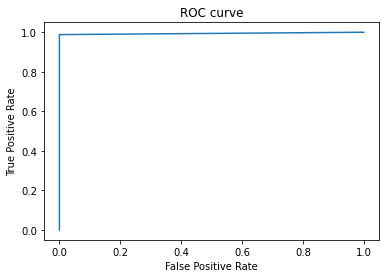

AUC value is 0.9940298507462686 


In [95]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred_test,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## AUC score for Random Forest is = 99.40%

# DecisionTreeClassifier

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [97]:
dt=DecisionTreeClassifier()

In [98]:
for i in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i , "The model performs very well")
        print("At random state ", i)
        print("Training accuracy is : ", accuracy_score(y_train,pred_train)*100)
        print("Testing r2 score is : ", accuracy_score(y_test,pred_test)*100)

At random state 55 The model performs very well
At random state  55
Training accuracy is :  99.4255703266043
Testing r2 score is :  99.35992122107336
At random state 57 The model performs very well
At random state  57
Training accuracy is :  99.40915805022156
Testing r2 score is :  99.40915805022156
At random state 61 The model performs very well
At random state  61
Training accuracy is :  99.40915805022156
Testing r2 score is :  99.40915805022156
At random state 66 The model performs very well
At random state  66
Training accuracy is :  99.40915805022156
Testing r2 score is :  99.40915805022156
At random state 69 The model performs very well
At random state  69
Training accuracy is :  99.4255703266043
Testing r2 score is :  99.35992122107336
At random state 83 The model performs very well
At random state  83
Training accuracy is :  99.40915805022156
Testing r2 score is :  99.40915805022156
At random state 85 The model performs very well
At random state  85
Training accuracy is :  99.4

In [99]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=11)
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
print(accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))

99.40915805022156
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1069
           1       0.99      1.00      0.99       962

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



## Cross Validation for Decision Tree

In [100]:
pred_dt=dt.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_dt)
for i in range(10,30):
    dtscore=cross_val_score(dt,x,y,cv=i)
    dtsc=dtscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", dtsc)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 10
cross validation score is  0.9637067602203115
accuracy score is  0.9940915805022157


at cv :- 11
cross validation score is  0.9630910911151183
accuracy score is  0.9940915805022157


at cv :- 12
cross validation score is  0.9630723781388478
accuracy score is  0.9940915805022157


at cv :- 13
cross validation score is  0.9667692307692308
accuracy score is  0.9940915805022157


at cv :- 14
cross validation score is  0.972578915238717
accuracy score is  0.9940915805022157


at cv :- 15
cross validation score is  0.984250385941937
accuracy score is  0.9940915805022157


at cv :- 16
cross validation score is  0.9901516563388156
accuracy score is  0.9940915805022157


at cv :- 17
cross validation score is  0.9901550578390353
accuracy score is  0.9940915805022157


at cv :- 18
cross validation score is  0.9872104925795839
accuracy score is  0.9940915805022157


at cv :- 19
cross validation score is  0.988187874312716
accuracy score is  0.9940915805022157


at cv :- 20
cross valid

### After applying the CV=24&25, there are no difference  between  Accuracy score & CVscore. It mean that our model is not overfit.

### Though my model is already predicting 99.4% Accuracy & it is also not overfitted, that why there are no need of any hyper parameter tunning.

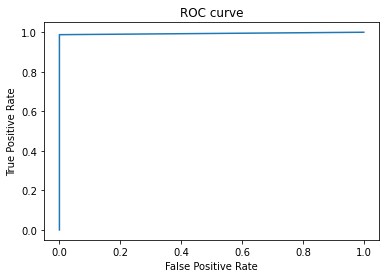

AUC value is 0.9938398357289528 


In [101]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(pred_test,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## AUC score of Decision Tree = 99.38%

## *Conclusion:

### `Random forest and Decision Tree give us the best result.`

# ****Model : 2

### `Those features are less correlate with the target, separating them.`

In [102]:
df=pd.read_csv(r"mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [103]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Label Encoding

In [104]:
lb=LabelEncoder()
for val in df.columns:
    df[val]=lb.fit_transform(df[val])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Correlation:

In [107]:
cor=df.corr()
relation=cor['class'].sort_values(ascending=False)
relation

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

## Observation of above correlation:

- The veil-type feature is not  related with the target variable.
- The cap-shape, gill-attachment,veil-color features are very less correlated with the target variable.
- The cap-color, odor,stalk-shape,stalk-color-below-ring, stalk-color-above-ring features are negatively correlated and also very less correlated.

## Conclusion:
If we drop above mentioned variables from our dataset, that it will make a very less impact on our target variable.


## Dropping the columns:-

In [108]:
df=df.drop(columns=['veil-type','cap-shape','gill-attachment','veil-color','cap-color','odor','stalk-shape','stalk-color-below-ring', 'stalk-color-above-ring'])
df.head()

,class,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,1,0,1,4,3,2,2,1,4,2,3,5
1,0,2,1,0,0,4,2,2,2,1,4,3,2,1
2,0,2,1,0,0,5,2,2,2,1,4,3,2,3
3,1,3,1,0,1,5,3,2,2,1,4,2,3,5
4,0,2,0,1,0,4,3,2,2,1,0,3,0,1


In [109]:
df.shape

(8124, 14)

In [112]:
cor=df.corr()
relation=cor['class'].sort_values(ascending=False)
relation

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

# Plotting Heatmap

<AxesSubplot:>

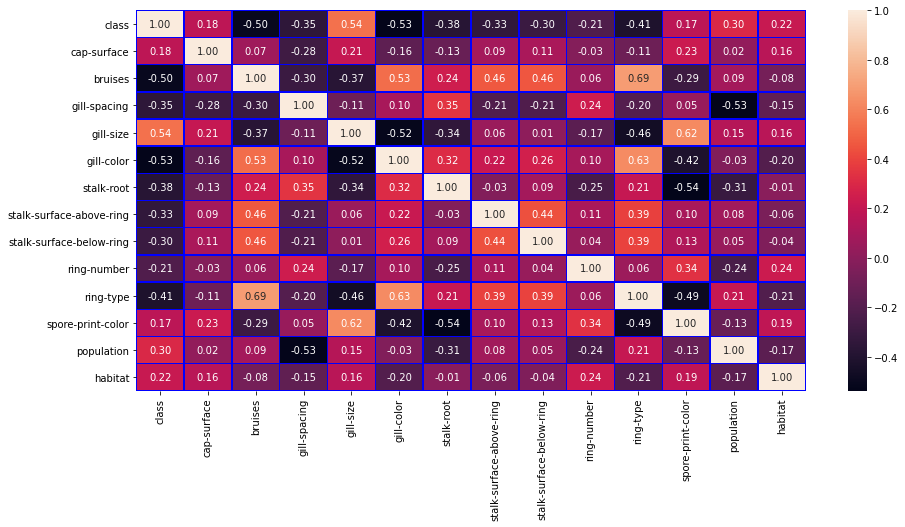

In [114]:
plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True, linewidths=0.5,linecolor='b',fmt='.2f')

## Observation of Heatmap:
"There are not seem any multicollinearity problem. So now we are good to go.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
rf=RandomForestClassifier()

In [131]:
# separating dependent variable andn independent variable.
x=df.drop('class',axis=1)
y=df['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

## Random Forest Classifier

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=73)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
pred_rf=rf.predict(x_test)
accu=accuracy_score(y_test,pred_rf)*100
print("Accuracy is : ", accu)
print('Confusion matrix is :', confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy is :  100.0
Confusion matrix is : [[1050    0]
 [   0  981]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Cross Validation:

In [132]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_rf)
for i in range(2,17):
    rfscore=cross_val_score(rf,x,y,cv=i)
    rfsc=rfscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", rfsc)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 2
cross validation score is  0.8124076809453471
accuracy score is  1.0


at cv :- 3
cross validation score is  0.8707533234859676
accuracy score is  1.0


at cv :- 4
cross validation score is  0.8719842442146726
accuracy score is  1.0


at cv :- 5
cross validation score is  0.895832512315271
accuracy score is  1.0


at cv :- 6
cross validation score is  0.9069423929098966
accuracy score is  1.0


at cv :- 7
cross validation score is  0.9152980910799675
accuracy score is  1.0


at cv :- 8
cross validation score is  0.9012625576975293
accuracy score is  1.0


at cv :- 9
cross validation score is  0.9330233431197696
accuracy score is  1.0


at cv :- 10
cross validation score is  0.96260035506759
accuracy score is  1.0


at cv :- 11
cross validation score is  0.9685078115389346
accuracy score is  1.0


at cv :- 12
cross validation score is  0.9684884293451502
accuracy score is  1.0


at cv :- 13
cross validation score is  0.9684923076923077
accuracy score is  1.0


at cv :- 14
cro

At cv=16, the Cross validation score and accuracy score is 100%.

In [134]:
rfscore=cross_val_score(rf,x,y,cv=16).mean()*100
print(" Cross Val score is : ", rfscore, '& Accuracy score is :' , accuracy_score*100)

 Cross Val score is :  100.0 & Accuracy score is : 100.0


# Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
lr=LogisticRegression()

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=79)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
accuracy=accuracy_score(y_test,pred_test)*100
print("Accuracy is : ", accuracy)
print('Confusion matrix is :', confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy is :  93.25455440669622
Confusion matrix is : [[539 499]
 [511 482]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1038
           1       0.49      0.49      0.49       993

    accuracy                           0.50      2031
   macro avg       0.50      0.50      0.50      2031
weighted avg       0.50      0.50      0.50      2031



## Cross Validation for logistic Regression:


In [162]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
accuracy_score= accuracy_score(y_test,pred_lr)
for i in range(10,25):
    lrscore=cross_val_score(lr,x,y,cv=i)
    lsc=lrscore.mean()
    print("at cv :-",i)
    print("cross validation score is ", lsc)
    print("accuracy score is ", accuracy_score)
    print('\n')

at cv :- 10
cross validation score is  0.8660637788643897
accuracy score is  0.9325455440669621


at cv :- 11
cross validation score is  0.8962418668349558
accuracy score is  0.9325455440669621


at cv :- 12
cross validation score is  0.9001723289020188
accuracy score is  0.9325455440669621


at cv :- 13
cross validation score is  0.8996692307692307
accuracy score is  0.9325455440669621


at cv :- 14
cross validation score is  0.9000786396818803
accuracy score is  0.9325455440669621


at cv :- 15
cross validation score is  0.884790818333322
accuracy score is  0.9325455440669621


at cv :- 16
cross validation score is  0.8911540111665036
accuracy score is  0.9325455440669621


at cv :- 17
cross validation score is  0.9143149483682318
accuracy score is  0.9325455440669621


at cv :- 18
cross validation score is  0.9180268582653647
accuracy score is  0.9325455440669621


at cv :- 19
cross validation score is  0.9212343521589327
accuracy score is  0.9325455440669621


at cv :- 20
cross val

#### At cv=21, the difference between cv score and accuracy score  is very less.

In [163]:
lrscore=cross_val_score(lr,x,y,cv=21).mean()*100
print(" Cross Val score is : ", lrscore, '& Accuracy score is :' , accuracy_score*100)

 Cross Val score is :  92.50241152277545 & Accuracy score is : 93.25455440669622


# Hyper Parameter Tunning

In [164]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters={'multi_class' : ['auto', 'ovr', 'multinomial'],
'random_state' : [20,30,45],
'max_iter' : [50,100] }

In [157]:
gscv=GridSearchCV(LogisticRegression(),parameters,cv=21)
gscv.fit(x_train,y_train)
gscv.best_params_

{'max_iter': 50, 'multi_class': 'auto', 'random_state': 20}

In [166]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
gscv_pred=gscv.best_estimator_.predict(x_test)
accuracy_score(y_test,gscv_pred)

0.9325455440669621

## After tunning the accuracy score is same...i.e. that It is the final accuracy of the our model.

# ROC AUC Curve

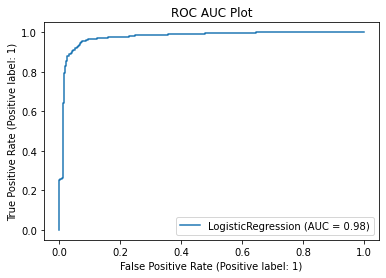

In [167]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

### `Final Accuracy is 93.25% & AUC score is 98% Which is pretty good.`

# Saving the model in pickle format

In [168]:
import joblib
joblib.dump(gscv.best_estimator_,'Mushroom.pkl')


['Mushroom.pkl']